**CAPSTONE BANGKIT 2023**

**Cari Matang (Application Detecting Rotten Fruits)**


### Connect Google Drive



Link Dataset
https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification

In [ ]:
import tensorflow as tf
print(tf. __version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Accessing directory dataset


In [ ]:
import os

base_dir = '/content/drive/MyDrive/Capstone Bangkit/dataset/train'

freshapples_dir = os.path.join(base_dir, 'freshapples')
freshbanana_dir = os.path.join(base_dir, 'freshbanana')
freshoranges_dir = os.path.join(base_dir, 'freshoranges')
rottenapples_dir = os.path.join(base_dir, 'rottenapples')
rottenbanana_dir = os.path.join(base_dir, 'rottenbanana')
rottenoranges_dir = os.path.join(base_dir, 'rottenoranges')

print('total training fresh apples images :', len(os.listdir(freshapples_dir)))
print('total training fresh banana images :', len(os.listdir(freshbanana_dir)))
print('total training fresh oranges images:', len(os.listdir(freshoranges_dir)))
print('total training rotten apples images:', len(os.listdir(rottenapples_dir)))
print('total training rotten banana images:', len(os.listdir(rottenbanana_dir)))
print('total training rotten oranges images:', len(os.listdir(rottenoranges_dir)))

freshapples_files = os.listdir(freshapples_dir)
print(freshapples_files[:10])

freshbanana_files = os.listdir(freshbanana_dir)
print(freshbanana_files[:10])

freshoranges_files = os.listdir(freshoranges_dir)
print(freshoranges_files[:10])

rottenapples_files = os.listdir(rottenapples_dir)
print(rottenapples_files[:10])

rottenbanana_files = os.listdir(rottenbanana_dir)
print(rottenbanana_files[:10])

rottenoranges_files = os.listdir(rottenoranges_dir)
print(rottenoranges_files[:10])


total training fresh apples images : 1693
total training fresh banana images : 1581
total training fresh oranges images: 1476
total training rotten apples images: 2342
total training rotten banana images: 2224
total training rotten oranges images: 1595
['rotated_by_45_Screen Shot 2018-06-08 at 5.01.08 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.20.42 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.01.01 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.04.24 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.12.34 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.10.03 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.18.12 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.14.56 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 4.59.44 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.08.05 PM.png']
['rotated_by_45_Screen Shot 2018-06-12 at 9.49.54 PM.png', 'rotated_by_45_Screen Shot 2018-06-12 at 9.43.32 PM.png', 'rotated_by_45_Screen Shot 2018-06-12 at 9.45.34 

### Showing dataset

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_freshapples = [os.path.join(freshapples_dir, fname)
                for fname in freshapples_files[pic_index-2:pic_index]]
next_freshbanana = [os.path.join(freshbanana_dir, fname)
                for fname in freshbanana_files[pic_index-2:pic_index]]
next_freshoranges = [os.path.join(freshoranges_dir, fname)
                for fname in freshoranges_files[pic_index-2:pic_index]]
next_rottenapples = [os.path.join(rottenapples_dir, fname)
                for fname in rottenapples_files[pic_index-2:pic_index]]
next_rottenbanana = [os.path.join(rottenbanana_dir, fname)
                for fname in rottenbanana_files[pic_index-2:pic_index]]
next_rottenoranges = [os.path.join(rottenoranges_dir, fname)
                for fname in rottenoranges_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_freshapples+next_freshbanana+next_freshoranges+next_rottenapples+next_rottenbanana+next_rottenoranges):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Build the Model

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Define Callbacks


In [ ]:
ACCURACY_THRESHOLD = 0.95
LOSS_THRESHOLD = 0.09

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < LOSS_THRESHOLD):
            print("\nLoss is lower than 0.09 so stopping training!")
            self.model.stop_training = True

callbacks = myCallback()

### Prepare Image Data Generator For Train Model


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Capstone Bangkit/dataset/train"
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = "/content/drive/MyDrive/Capstone Bangkit/dataset/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126,
	shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126,
	shuffle=True
)

Found 10911 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
train_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [ ]:
validation_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [ ]:
NUM_TRAIN_DATA = train_generator.n
NUM_VALID_DATA = validation_generator.n

# Train and Evaluate the model

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3, callbacks=[callbacks])

Epoch 1/25
20/20 [==============================] - 1310s 69s/step - loss: 0.5503 - accuracy: 0.8083 - val_loss: 0.4333 - val_accuracy: 0.8624
Epoch 2/25
20/20 [==============================] - 819s 42s/step - loss: 0.4114 - accuracy: 0.8575 - val_loss: 0.3462 - val_accuracy: 0.8730
Epoch 3/25
20/20 [==============================] - 628s 32s/step - loss: 0.3802 - accuracy: 0.8671 - val_loss: 0.3146 - val_accuracy: 0.8995
Epoch 4/25
20/20 [==============================] - 510s 26s/step - loss: 0.2900 - accuracy: 0.8984 - val_loss: 0.3093 - val_accuracy: 0.8836
Epoch 5/25
20/20 [==============================] - 389s 19s/step - loss: 0.2943 - accuracy: 0.8933 - val_loss: 0.2383 - val_accuracy: 0.9153
Epoch 6/25
20/20 [==============================] - 294s 15s/step - loss: 0.2629 - accuracy: 0.9063 - val_loss: 0.2814 - val_accuracy: 0.8889
Epoch 7/25
20/20 [==============================] - 256s 13s/step - loss: 0.2480 - accuracy: 0.9071 - val_loss: 0.1868 - val_accuracy: 0.9392
Epoch

In [ ]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

87/87 [==============================] - 68s 784ms/step - loss: 0.0441 - accuracy: 0.9847
Loss: 0.0441
Accuracy: 0.9847


In [ ]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

22/22 [==============================] - 28s 1s/step - loss: 0.0747 - accuracy: 0.9711
Loss: 0.0747
Accuracy: 0.9711


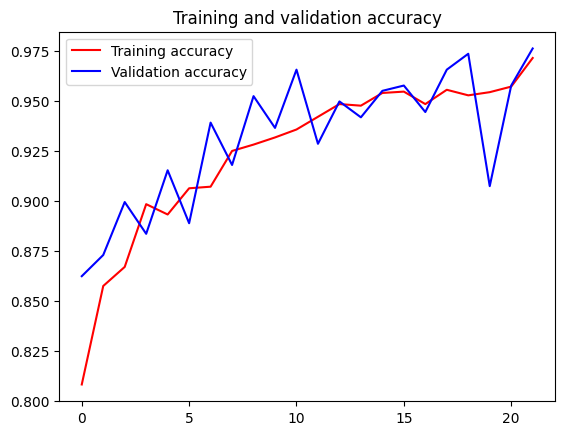

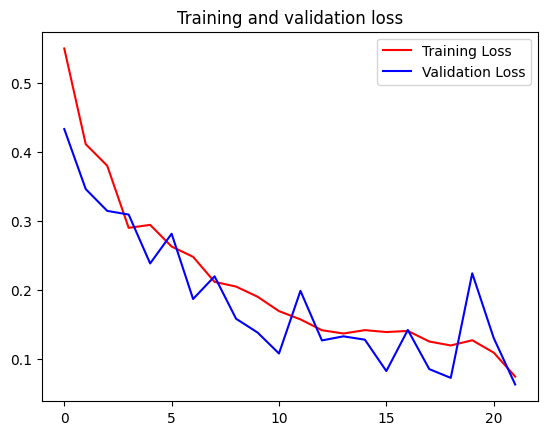

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Testing the Model


In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving jerusk busuk.jpeg to jerusk busuk.jpeg
1/1 [==============================] - 0s 18ms/step
jerusk busuk.jpeg
[[0. 0. 1. 0. 0. 0.]]


### Convert model to H5


In [ ]:
from tensorflow import keras
model.save()